In [1]:
def strip_word( w ):
    w = w.lower()
    w = ''.join([i for i in w if i.isalpha()])
    return( w )

def sort_dictionary( D ):
    Ds = sorted(D.items(), key=lambda x:x[1], reverse=True)               
    return Ds

In [2]:
import os
directory=r'/Users/zhouyi/Desktop/Info206B/Assignment/assignment 4/data'#set the directory
os.listdir(directory)

['dr9.txt',
 'dr8.txt',
 'pk7.txt',
 'pk6.txt',
 'pk4.txt',
 'pk5.txt',
 'pk1.txt',
 'pk2.txt',
 'pk3.txt',
 'pk8.txt',
 'pk9.txt',
 'dr1.txt',
 'dr3.txt',
 'dr2.txt',
 'dr6.txt',
 'dr7.txt',
 'dr5.txt',
 'dr4.txt']

In [3]:
def build_dictionary(prefix):
    my_dictionary = {} 
    N=0 
    for file in os.listdir(directory):
        if file.startswith(prefix) and file.endswith(".txt"):
            with open(os.path.join(directory, file), 'r') as f:
                for line in f:
                    line=line.split() 
                    N=N+len(line)
                    for word in line:
                        word=strip_word(word)
                        if len(word)!=0:
                            if word in my_dictionary: 
                                my_dictionary[word] +=1 
                            else:
                                my_dictionary[word] = 1 

    for key in my_dictionary:
        my_dictionary[key]=my_dictionary[key]/N*100
    return my_dictionary

def print_dictionary(Dic):
    for key in Dic:
        print(key,Dic[key])

In [4]:
all_items=sort_dictionary(build_dictionary('')) 
first_25=all_items[0:25]
first_25_word=[]
for key in first_25:
    percent=key[0]
    first_25_word.append(percent)
first_25_word

['the',
 'to',
 'of',
 'and',
 'a',
 'in',
 'that',
 'is',
 'for',
 'on',
 'it',
 'as',
 'i',
 'was',
 'but',
 'with',
 'at',
 'this',
 'be',
 'not',
 'has',
 'have',
 'are',
 'my',
 'an']

In [5]:
pk = ["pk1.txt","pk2.txt","pk3.txt","pk4.txt","pk5.txt","pk6.txt","pk7.txt","pk8.txt","pk9.txt"]
dr = ["dr1.txt","dr2.txt","dr3.txt","dr4.txt","dr5.txt","dr6.txt","dr7.txt","dr8.txt","dr9.txt"]

In [6]:
F1=[]
for a in pk:
    pkdic=build_dictionary(a)          
    for i in first_25_word:
        if i not in pkdic:
            pkdic[i]=0  
    pklist=[]
    for i in first_25_word:
        if i in pkdic:
            pklist.append(pkdic[i])

    F1.append(pklist)
    
F2=[]
drlist=[]
for b in dr:
    drdic=build_dictionary(b)          
    for i in first_25_word:
        if i not in drdic:
            drdic[i]=0      
    drlist=[]    
    for i in first_25_word:
        if i in drdic:
            drlist.append(drdic[i]) 

    F2.append(drlist) 

In [8]:
import numpy as np
F11 = np.zeros((9,25))
for i in range(len(F1)):
    for j in range(len(F1[i])):
        F11[i,j] = F1[i][j]
F22 = np.zeros((9,25))
for i in range(len(F1)):
    for j in range(len(F1[i])):
        F22[i,j] = F2[i][j]

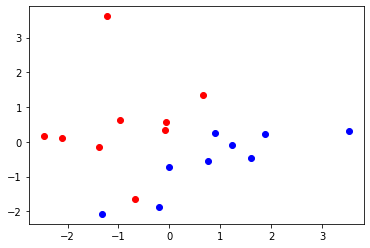

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

F = np.concatenate((F11,F22),axis=0)
pca = PCA(n_components=2)
Fp  = pca.fit(F).transform(F)
plt.scatter( Fp[0:9,0], Fp[0:9,1], color='b')
plt.scatter( Fp[9:18,0], Fp[9:18,1], color='r' )